In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
from openpyxl import Workbook  
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
print(tf.__version__)

2.3.0


In [2]:
emp1=pd.ExcelFile(r'C:\Users\yungun\Documents\카카오톡 받은 파일\Input.xlsx')
emp2=pd.ExcelFile(r'C:\Users\yungun\Documents\카카오톡 받은 파일\Output.xlsx')


In [3]:
dataset1 = emp1.parse('Sheet1')
dataset2 = emp2.parse('Sheet1')

In [4]:
train_dataset = dataset1[:600] #80퍼센트 정보를 랜덤하게 가져옴

test_dataset = dataset1.drop(train_dataset.index)
test_dataset

,A,B,C,D,E,F,G,H,I,J
600,24,26,28,1,6,7,6,56718.171875,56720.605469,2683.005772
601,24,26,28,1,6,7,6,56676.179688,56720.605469,2683.005772
602,24,26,28,1,6,7,6,56620.222656,56720.605469,2683.005772
603,24,26,28,1,6,7,6,56610.222656,56720.605469,2683.005772
604,24,26,28,1,6,7,6,56554.207031,56720.605469,2683.005772
...,...,...,...,...,...,...,...,...,...,...
743,21,22,22,1,5,5,2,49393.199219,49634.101562,1558.502872
744,21,22,22,1,5,5,2,49383.199219,49634.101562,1558.502872
745,21,22,22,1,5,5,2,49327.144531,49634.101562,1558.502872
746,21,22,22,1,5,5,2,49200.148438,49634.101562,1558.502872


In [5]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
A,600.0,31.295000,4.325408,24.000000,30.000000,30.000000,33.000000,42.000000
B,600.0,32.763333,6.016171,26.000000,29.000000,29.000000,40.000000,42.000000
C,600.0,46.966667,10.521409,29.000000,36.000000,48.000000,57.000000,60.000000
D,600.0,1.366667,0.482296,1.000000,1.000000,1.000000,2.000000,2.000000
E,600.0,6.900000,1.285595,6.000000,6.000000,6.000000,7.000000,11.000000
F,600.0,8.151667,1.800203,7.000000,7.000000,7.000000,11.000000,11.000000
G,600.0,8.513333,1.910298,6.000000,6.000000,10.000000,10.000000,10.000000
H,600.0,70244.288672,8063.917339,56747.175781,62822.896484,70085.199219,77342.652344,83805.203125
I,600.0,70477.696960,8099.027928,57220.605469,63248.406250,70395.101562,77636.421875,84274.234375
J,600.0,3655.724660,805.640375,2683.005772,3174.204765,3229.294762,4633.884727,5093.662685


In [17]:
train_out = dataset2[:600]
test_out = dataset2.drop(train_out.index)
train_out

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.00
0,59.999998,59.999999,59.999999,59.999998,59.999997,59.999995,59.999992,59.999989,59.999985,59.999980,...,59.828208,59.828321,59.828443,59.828571,59.828706,59.828848,59.828993,59.829145,59.829301,59.829461
1,59.999999,59.999999,59.999999,59.999998,59.999997,59.999995,59.999993,59.999990,59.999986,59.999981,...,59.828756,59.828868,59.828986,59.829112,59.829245,59.829384,59.829528,59.829678,59.829833,59.829991
2,59.999995,59.999992,59.999989,59.999987,59.999983,59.999979,59.999975,59.999969,59.999963,59.999957,...,59.811614,59.811777,59.811940,59.812104,59.812264,59.812424,59.812581,59.812736,59.812888,59.813035
3,59.999995,59.999993,59.999991,59.999989,59.999985,59.999982,59.999977,59.999972,59.999966,59.999960,...,59.813656,59.813817,59.813979,59.814144,59.814308,59.814471,59.814630,59.814789,59.814946,59.815101
4,59.999996,59.999995,59.999993,59.999991,59.999988,59.999985,59.999981,59.999977,59.999972,59.999966,...,59.816976,59.817133,59.817294,59.817456,59.817620,59.817785,59.817949,59.818115,59.818279,59.818440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,59.999952,60.000089,60.000182,60.000258,60.000281,60.000291,60.000329,60.000353,60.000361,60.000337,...,59.555155,59.554858,59.554564,59.554277,59.553987,59.553703,59.553423,59.553145,59.552874,59.552604
596,59.999955,60.000092,60.000185,60.000262,60.000285,60.000296,60.000335,60.000366,60.000371,60.000349,...,59.565003,59.564705,59.564410,59.564119,59.563829,59.563540,59.563255,59.562973,59.562695,59.562420
597,59.999956,60.000093,60.000186,60.000264,60.000288,60.000299,60.000337,60.000369,60.000379,60.000355,...,59.566709,59.566414,59.566120,59.565826,59.565535,59.565246,59.564962,59.564679,59.564398,59.564121
598,59.999966,60.000095,60.000189,60.000263,60.000288,60.000300,60.000338,60.000368,60.000378,60.000356,...,59.577801,59.577508,59.577215,59.576923,59.576631,59.576342,59.576053,59.575766,59.575482,59.575198


In [18]:
train_input = train_dataset.copy()
test_input = test_dataset.copy()

In [19]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']     #std =standard deviation 표준편차 
normed_train_data = norm(train_input)
normed_test_data = norm(test_input)

In [20]:
normed_test_data 

,A,B,C,D,E,F,G,H,I,J
600,-1.686546,-1.124192,-1.802674,-0.760252,-0.700065,-0.639743,-1.315676,-1.677363,-1.698610,-1.207386
601,-1.686546,-1.124192,-1.802674,-0.760252,-0.700065,-0.639743,-1.315676,-1.682570,-1.698610,-1.207386
602,-1.686546,-1.124192,-1.802674,-0.760252,-0.700065,-0.639743,-1.315676,-1.689510,-1.698610,-1.207386
603,-1.686546,-1.124192,-1.802674,-0.760252,-0.700065,-0.639743,-1.315676,-1.690750,-1.698610,-1.207386
604,-1.686546,-1.124192,-1.802674,-0.760252,-0.700065,-0.639743,-1.315676,-1.697696,-1.698610,-1.207386
...,...,...,...,...,...,...,...,...,...,...
743,-2.380122,-1.789067,-2.372939,-0.760252,-1.477915,-1.750728,-3.409591,-2.585727,-2.573592,-2.603174
744,-2.380122,-1.789067,-2.372939,-0.760252,-1.477915,-1.750728,-3.409591,-2.586967,-2.573592,-2.603174
745,-2.380122,-1.789067,-2.372939,-0.760252,-1.477915,-1.750728,-3.409591,-2.593918,-2.573592,-2.603174
746,-2.380122,-1.789067,-2.372939,-0.760252,-1.477915,-1.750728,-3.409591,-2.609667,-2.573592,-2.603174


In [21]:
train_outs = train_out.describe()
train_outs = train_outs.transpose()
train_outs

,count,mean,std,min,25%,50%,75%,max
0.01,600.0,60.000081,0.000286,59.996696,59.999991,59.999998,60.000051,60.002357
0.02,600.0,60.000137,0.000285,59.999582,59.999989,59.999996,60.000130,60.002358
0.03,600.0,60.000188,0.000365,59.999899,59.999983,59.999993,60.000301,60.003009
0.04,600.0,60.000216,0.000436,59.999873,59.999967,59.999987,60.000380,60.003586
0.05,600.0,60.000233,0.000479,59.999663,59.999967,59.999984,60.000415,60.004448
...,...,...,...,...,...,...,...,...
9.96,600.0,59.657315,0.194326,58.614409,59.586010,59.737374,59.798185,59.829384
9.97,600.0,59.657126,0.194096,58.623956,59.587103,59.736894,59.798151,59.829528
9.98,600.0,59.656819,0.194686,58.611611,59.585340,59.736404,59.798100,59.829678
9.99,600.0,59.656691,0.194499,58.613356,59.586775,59.735908,59.798031,59.829833


In [22]:
def norm2(x):
    return (x - train_outs['mean']) / train_outs['std']     #std =standard deviation 표준편차 
normed_train_outs = norm2(train_out)
normed_test_outs = norm2(test_out)

In [23]:
def build_model():
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=[len(train_input.keys())]),
        layers.Dense(200, activation = 'relu'),
        layers.Dense(200, activation = 'relu'),
        layers.Dense(1000)
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse','accuracy',])
    return model

In [24]:
model = build_model()


In [25]:
print(train_input.keys())


Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              201000    
Total params: 262,500
Trainable params: 262,500
Non-trainable params: 0
_________________________________________________________________


In [27]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
# validation_split 은 20퍼센트가 tsst가 된다
history = model.fit(
    normed_train_data, normed_train_outs,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [28]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions

array([3.2986012 , 2.7694366 , 2.105729  , ..., 0.10786197, 0.07188005,
       0.1058127 ], dtype=float32)

In [29]:
def re(x):
    return (x * train_outs['std']) + train_outs['mean']     #std =standard deviation 표준편차 


In [30]:
x = []
for i in range (1000):
    x.append(0.01*i)
    
print(type(x))    


<class 'list'>


In [31]:
p = test_out.copy()

In [32]:
def plotgraph(i):
    plt.figure(figsize=(12,8))
    plt.plot(x,re(test_predictions[(i-1)*1000:(i)*1000]),label = 'Predict%d'%i)
    plt.plot(x,p[(i-1):(i)].transpose(), label = 'real%d'%i)
    plt.xlabel('Time')
    plt.ylabel('Predictions [Frequency]')
    plt.legend()
    plt.show()


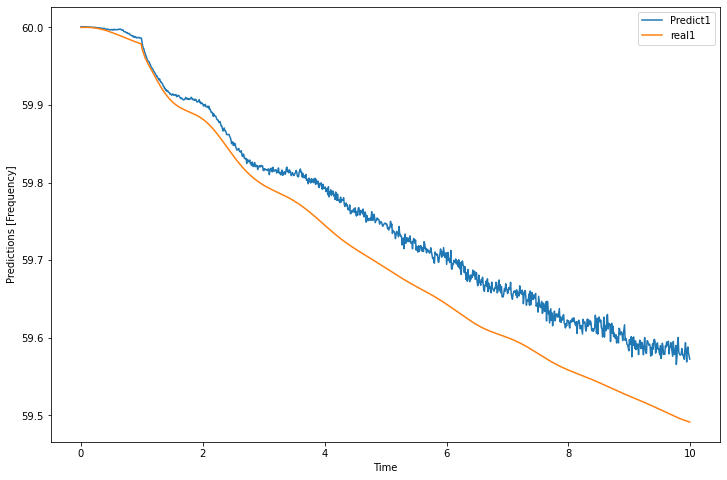

      A   B   C  D  E  F  G             H             I            J
600  24  26  28  1  6  7  6  56718.171875  56720.605469  2683.005772


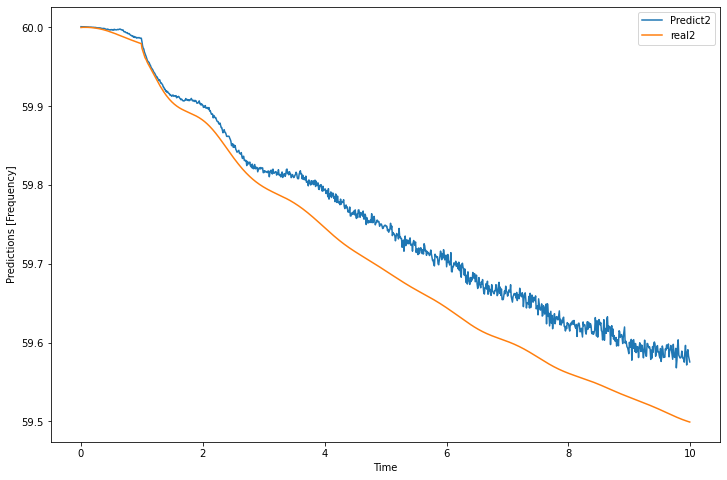

      A   B   C  D  E  F  G             H             I            J
601  24  26  28  1  6  7  6  56676.179688  56720.605469  2683.005772


In [33]:
for j in range(1,3):
    plotgraph(j)
    print(test_input[j-1:j])